In [10]:
import matplotlib.pyplot as plt 
import numpy as np
import ruptures as rpt
from sklearn.kernel_approximation import RBFSampler
from sklearn.gaussian_process.kernels import RBF

In [2]:
from src.alpin import Alpin
from src.cost import ITML_Metric, ITML_Kernel,Mahalanobis,SML
from src.utils import compute_f1,create_labels

In [3]:
from numpy import genfromtxt

datagaitXsens=[]
datagaitXsensbkps=[]
#vect=np.hstack((range(1,5),range(9,13)))
vect=[1,2,3,4,6,9,11,12,13,14,15,17,18,23,25,26,28,30,31,32,33,34,35,36,39,40,41,42,44,46,48,49,50,51,53,54,56,58,59,60,61,62,63,65,67,68,69,70,77,80,81,83,84,85,86,87,91,92,93,94,97,99,100,101,103,105,108,112,116,117,118,119,120,122,123,124,125,127,128,130,131,134,135,136,137]

for i in vect:
    datagaitXsens.append(genfromtxt("data/gaitdataset/"+str(i)+"-XSens.csv", delimiter=',')[1:,])
    datagaitXsensbkps.append(genfromtxt("data/gaitdataset/"+str(i)+"-XSens.bkps", delimiter=',',dtype="int"))
    
indiceun=[0,1,2,3,4,7,10,12,13,16,17,19,20,21,23,25,26,27,28,30,32,33,36,37,39,40,41,42,43,44,45,46,47,
          50,52,54,55,57,58,60,61,63,64,66,67,68,70,71,72,73,74,75,79,80,81,83,84]
indicepossible=[]
for i in range(len(datagaitXsensbkps)):
    bkp=datagaitXsensbkps[i]
    #print(bkp[-1])
    if bkp[-1]-bkp[-2]>90 and i in indiceun:
        #print(i)
        indicepossible.append(i)
        
def construitjddnonspectre(datagaitXsens,datagaitXsensbkps,indentr,indtest):
    signals=[]
    bkps=[]
    for i in indentr:
        signals.append(datagaitXsens[i])
        bkps.append(datagaitXsensbkps[i])
    signalstest=[]
    bkpstest=[]
    for i in indtest:
        signalstest.append(datagaitXsens[i])
        bkpstest.append(datagaitXsensbkps[i])
    return signals,bkps,signalstest,bkpstest


for j in range(1,7):
    sortie=[]
    indices=[indicepossible[j*m:j*(m+1)] for m in range(4)]
    hauss_entr=[]
    hauss_test=[]
    pourcentbon_entr=[]
    pourcentbon_test=[]
    hauss_bon_entr=[]
    hauss_bon_test=[]
    f1_entr=[]
    f1_test=[]
    
    for i in range(4):
        
        indicesentr=indices[i]
        indicestest=[]
        poubelle=[]
        for m in indicepossible:
            if m in indicesentr:
                poubelle.append(m)
            else:
                indicestest.append(m)
        indicestest=np.hstack(indicestest)
        #print(indicestest)
        rbf=RBFSampler(gamma=0.001,n_components=100,random_state=10)

        #Type 1 
        #[3,6,12,13],[16,21,25,10]

        signalsa,bkps,signalstesta,bkpstest=construitjddnonspectre(datagaitXsens,datagaitXsensbkps,indicesentr,indicestest)
        #un,deux=pairlabels2(signals,bkps,0.1)
        signals=[rbf.fit_transform(sign) for sign in signalsa]
        signalstest=[rbf.fit_transform(sign) for sign in signalstesta]

# Import the dataset 

In [4]:
"""
signals=[signal_1, signal_2,...]
bkps=[bkps_1, bkps_2,...]

You can load csv,txt or other file with numpy.genfromtxt : 

from numpy import genfromtext

signals=[]
signals.append(genfromtext("/path/to/file",delimiter=','))
"""

# To transform the data via a Gaussian kernel approximation, use :

gamma = X # This is the onlyThis is the only free parameter, 
# if you don't know what value to use try in order until you get good performance: 100, 10, 1, 0.1, 0.01, 0.001

rbf=RBFSampler(gamma=gamma,n_components=100,random_state=10)

signals_Gaussian=[rbf.fit_transform(signal) for signal in signals]


# To use this transformation in the following, uncomment these two lines: 
# Old_signals=signals
# signals=signals_Gaussian

'\nsignals=[signal_1, signal_2,...]\nbkps=[bkps_1, bkps_2,...]\n\nYou can load csv,txt or other file with numpy.genfromtxt : \n\nfrom numpy import genfromtext\n\nsignals=[]\nsignals.append(genfromtext("/path/to/file",delimiter=\',\'))\n'

# Compute metric and penality 

## Metric

In [5]:
MetricCost=SML(signals,bkps)
"""
You can also use : 
ITML :

kernel_init = kernels.RBF(variance)  
itml = ITML_Kernel()
itml.pre_fit(signaux,labels,kernel_init,u,l,gamma) 
 
OR 

d=signals[0].shape[0]
metric_init=np.eye(d)
itml = ITML_Metric()
itml.pre_fit(signaux,labels,metric_init,u,l,gamma) 

Custom made metric : 

M=function(..)
MetricCost=Mahalanobis(M)
"""

/home/think/.local/lib/python3.9/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


'\nYou can either use : \nITML :\n\nCustom made metric : \n\n'

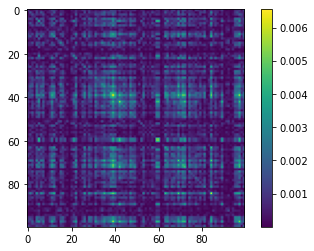

In [12]:
# You can access the learned matrix by using the .M method : 

plt.imshow(np.abs(MetricCost.M))
plt.colorbar()
plt.show()

## Penality

In [19]:
nb_bkps=len(bkps[0]) # If you know the number of breakpoint per signal, enter the value here

Estimateur=rpt.Dynp(custom_cost=MetricCost,jump=10)
bkps_pred=[Estimateur.fit_predict(sign,nb_bkps) for sign in signals]

EstimateurPelt=rpt.Pelt(custom_cost=MetricCost,jump=10)
EstimateurAlpin=Alpin(estimator=EstimateurPelt).fit(signals,bkps_pred)
# Or if you have clean bkps annotation : EstimateurAlpin==Alpin(estimator=EstimateurP).fit(signals,bkps)


In [20]:
print(f"Best penalty value: {EstimateurAlpin.get_best_penalty(signals[0])}")
print(f"Best penalty weights: {EstimateurAlpin.best_penalty_weights}")

Best penalty value: 0.3062235772481041
Best penalty weights: [-0.71748926  0.41685555]


# Compute prediction 

In [23]:
bkpsalpin_train=[EstimateurAlpin.predict(sign) for sign in signals]
bkpsalpin_test=[EstimateurAlpin.predict(sign) for sign in signalstest]

(<Figure size 720x864 with 6 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>], dtype=object))

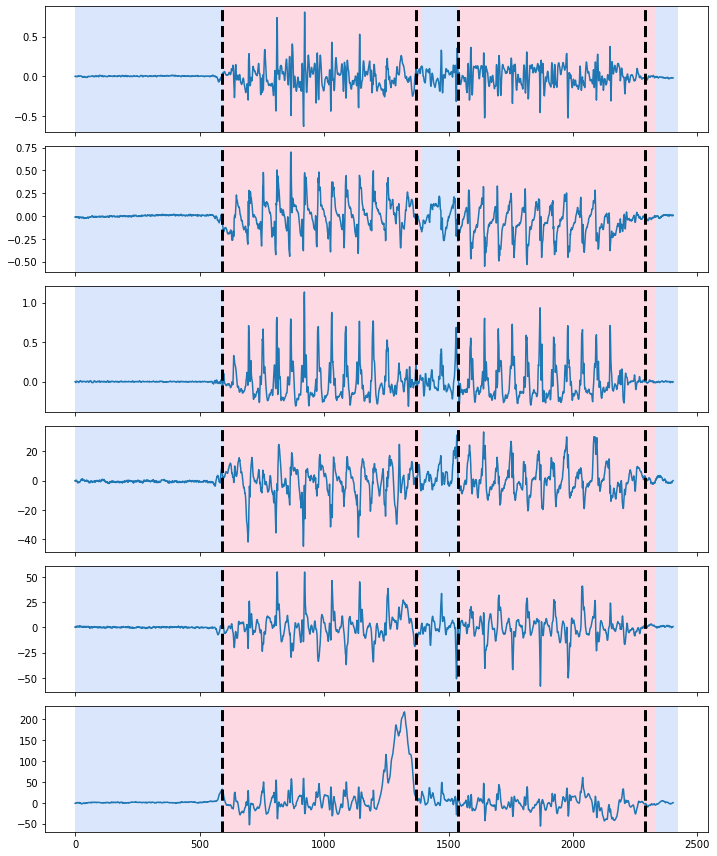

In [33]:
rpt.display(signals[0][:,:6],bkps[0],bkpsalpin_train[0])